<a href="https://colab.research.google.com/github/moon4sake/ms_thesis/blob/main/banzhaf_value_approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as dsets
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
%matplotlib inline

import time
import math
from itertools import permutations
from math import factorial
from collections import defaultdict

# np.random.seed(2020)

#Synthetic Dataset

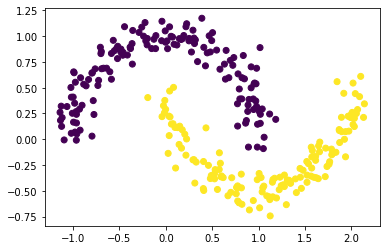

In [7]:
n = 300

# data_blobs = dsets.make_blobs(n_samples = n*2,
#                               n_features = 2,
#                               centers = [[1, 1], [-1, -1]])

data_moons = dsets.make_moons(n_samples = n*2,
                              shuffle = True,
                              noise = 0.1)


X_train, X_test, y_train, y_test = train_test_split(data_moons[0], 
                                                    data_moons[1], 
                                                    test_size = 0.5)


plt.scatter([x[0] for x in X_train], [x[1] for x in X_train], c = y_train)
plt.savefig('data')

#Banzhaf Value Approximation

In [ ]:
def score(x):
    clf = svm.SVC(kernel = 'rbf')
    clf.fit(center_x + x[0], center_y + x[1])
    y_pred = clf.predict(X_test)
    return  metrics.accuracy_score(y_test, y_pred)

ban = defaultdict(list)
for x in X_train:
    ban[tuple(x)].append(0)

epoch = 1000

train_data = [(X_train[j], y_train[j]) for j in range(n)]

t = 0

start_time = time.time()

while True:
    t += 1
    if t > epoch: break
    else: print(t)

    b = np.random.binomial(1, 0.5, n)
    v_after, v_before = 0, 0
    subset = []

    for idx, x in enumerate(train_data):
        if b[idx]:
            subset.append(x)

    v_before = score(([s[0] for s in subset], [s[1] for s in subset]))
    # print(v_before)
    # print(len(subset))

    stop, many = 0, 0

    for j in range(n):
        if b[j]: continue

        v_after = score(([s[0] for s in subset] + [train_data[j][0]],
                         [s[1] for s in subset] + [train_data[j][1]]))
        # print(v_after, v_before)

        ban_j = ban[tuple(train_data[j][0])]
        l = len(ban_j)
        ban_j.append(((l-1) * ban_j[-1] + v_after - v_before) / l)

        many += 1
        if abs(ban_j[-1] - ban_j[-2]) < 0.0005:
            stop += 1

    if stop == many:
        print(f"Convergence condition met on epoch {t}")
        break

t = time.time() - start_time
h = int(t/3600)
m = int((t - h*3600)/60)
s = t - h*3600 - m*60
print("--- %s hours  %s minutes  %s seconds---" %(h, m, s))

for x in X_train:
    plt.plot(ban[tuple(x)])
plt.title('Banzhaf value')
plt.xlabel('iterations')
plt.savefig('testB')
print(sum([ban[tuple(x)][-1] for x in X_train]))
print([ban[tuple(x)][-1] for x in X_train])


#Results

In [ ]:
t = [ban[tuple(x)][-1] for x in X_train]
t.sort()
c = 0
n = 0
for x in t[::-1]:
    n += 1
    c += x
    plt.scatter(n, c, marker='.', c='blue', s=5)
plt.xlabel('number of data')
plt.title('accuracy')
plt.savefig('accuracy_banzhaf')

In [ ]:
for x in X_train[:10]:
    plt.plot(ban[tuple(x)])

plt.xlabel('iterations')
plt.title('Banzhaf_fictitious_10')
plt.savefig('Banzhaf_fictitious_10')